# Import data

In [463]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data_import = pd.read_csv('/Users/traxie/Downloads/bank.csv')
df = pd.DataFrame(data_import)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [464]:
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


(None, (11162, 17))

# Data Cleaning

In [466]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [467]:
df.duplicated().sum()

0

Dataset does not have missing values and duplicates. Data is considered tidy.

# Explore variables

In [470]:
# Numerical variables
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


(1) Age range from 18 to 95, but 75% of customers approached are under 49.

(2) Most of contact calls last from about 138-496 seconds, or 2-8 minutes 
=> (?) What's the duration range of calls that got 'yes' approval?

(3) 75% of customers got contacted under 3 calls during this campaign
=> (?) What kind of customers get contacted over 3 times? Existing or new customers?

(4) At least 50% of customers of the campaign are new customers (no previous contact point)
=> (?) Do new customers or existing customers respond better to the campaign?

In [472]:
#Categorical variables
df.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


(1) About 20% of campaign customers are from management roles

(2) About half of campaign customers are married, receive secondary education and do not own housing

(3) The majority of customers do not have loans at the bank

(4) May is the month that the bank contacted most customers

(5)! Slightly over half of campaign customers do not give approval to place deposit

# Enriching data

In [475]:
#Create age groups
df.loc[df.age <= 25, ['Age Group']] = 'Under 25'
df.loc[(df.age <= 35) & (df.age > 25), ['Age Group']] = '25 - 35'
df.loc[(df.age <= 45) & (df.age > 35), ['Age Group']] = '35 - 45'
df.loc[(df.age <= 55) & (df.age > 45), ['Age Group']] = '45 - 55'
df.loc[(df.age <= 65) & (df.age > 55), ['Age Group']] = '55 - 65'
df.loc[df.age > 65, ['Age Group']] = 'Over 65'

# EDA: Relationship between certain variables and the outcome variable ('deposit')

## Categorical variables

In [478]:
categorcal_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan',	'contact',	'poutcome', 'Age Group']

In [479]:
# Create function that plots pattern of yes/no decisions by a specific categorical dimension
def plot_bar(variable):
    plot_data = pd.DataFrame()
    plot_data['yes'] = df[(df.deposit == 'yes')][variable].value_counts()
    plot_data['no'] = df[(df.deposit == 'no')][variable].value_counts()
    
    plot_data.plot(kind = 'bar', figsize = (5,5))
    plt.xlabel(f'{variable}')
    plt.ylabel('Number of customers')
    plt.title(f'Distribution of {variable} and deposit approval')
    plt.show()

#Create function that creates table showing approval rate by a specific dimension
def create_table(variable):
    plot_data = pd.DataFrame()
    plot_data['yes'] = df[(df.deposit == 'yes')][variable].value_counts()
    plot_data['no'] = df[(df.deposit == 'no')][variable].value_counts()
    plot_data['yes_perc'] = round(100*plot_data['yes']/df[variable].value_counts(),2)
    plot_data['no_perc'] = round(100*plot_data['no']/df[variable].value_counts(),2)
    print(plot_data[['yes_perc','no_perc']])

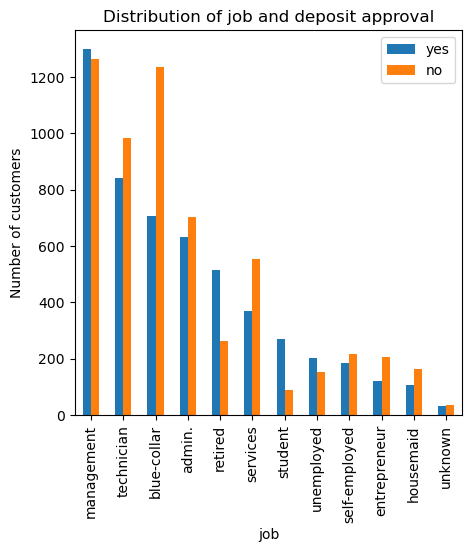

               yes_perc  no_perc
job                             
management        50.70    49.30
technician        46.08    53.92
blue-collar       36.42    63.58
admin.            47.30    52.70
retired           66.32    33.68
services          39.98    60.02
student           74.72    25.28
unemployed        56.58    43.42
self-employed     46.17    53.83
entrepreneur      37.50    62.50
housemaid         39.78    60.22
unknown           48.57    51.43


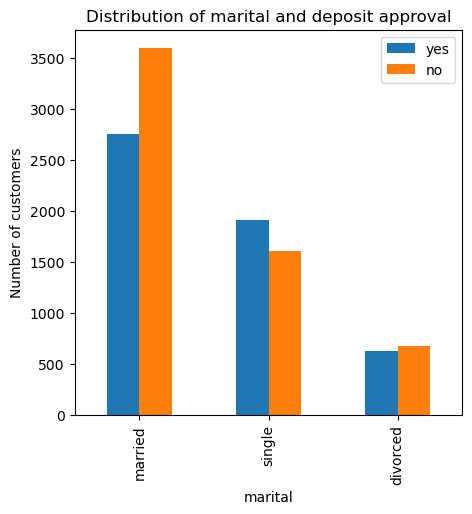

          yes_perc  no_perc
marital                    
married      43.38    56.62
single       54.35    45.65
divorced     48.11    51.89


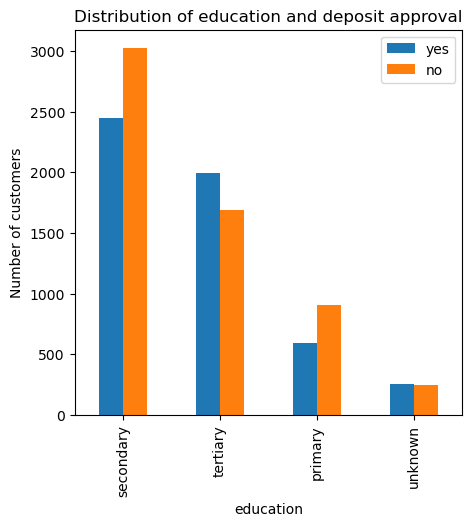

           yes_perc  no_perc
education                   
secondary     44.74    55.26
tertiary      54.11    45.89
primary       39.40    60.60
unknown       50.70    49.30


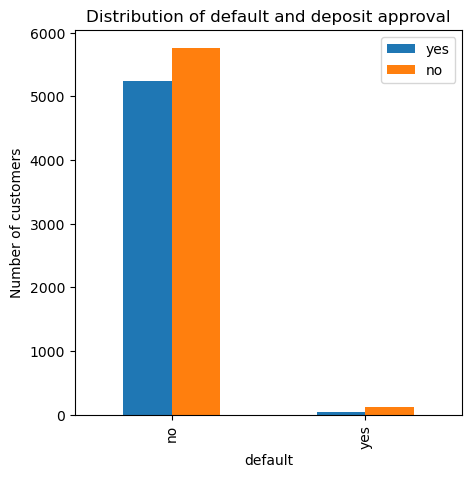

         yes_perc  no_perc
default                   
no          47.64    52.36
yes         30.95    69.05


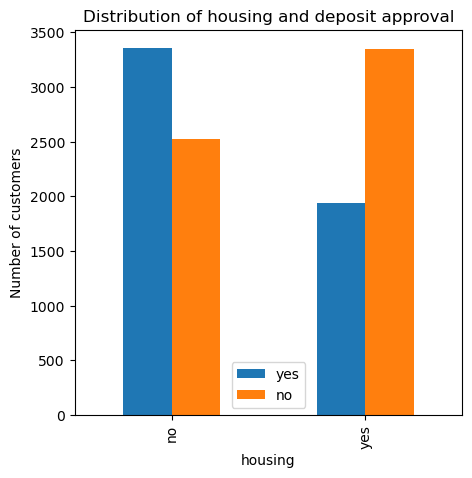

         yes_perc  no_perc
housing                   
no          57.03    42.97
yes         36.64    63.36


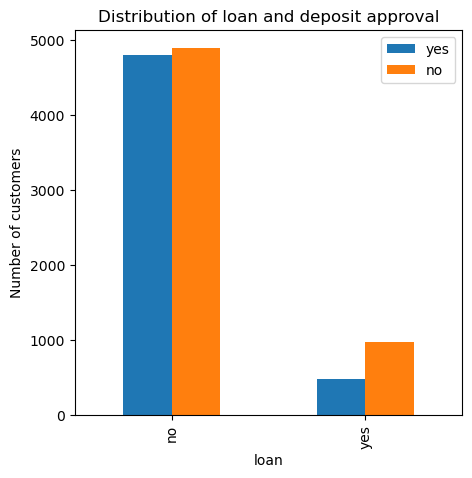

      yes_perc  no_perc
loan                   
no       49.53    50.47
yes      33.15    66.85


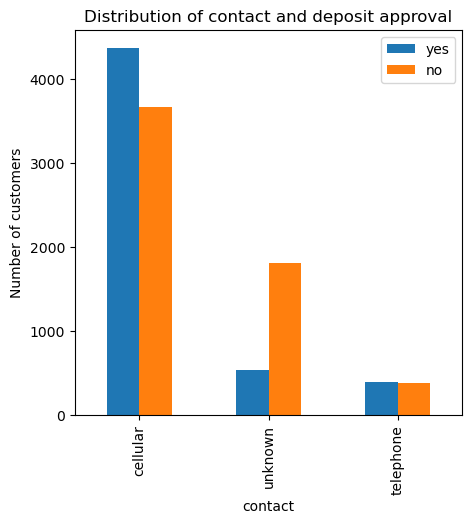

           yes_perc  no_perc
contact                     
cellular      54.33    45.67
unknown       22.59    77.41
telephone     50.39    49.61


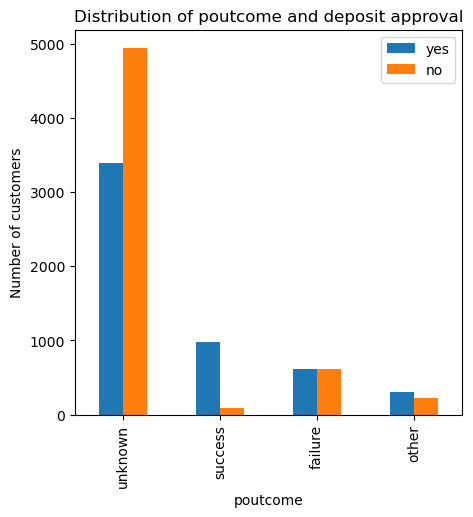

          yes_perc  no_perc
poutcome                   
unknown      40.67    59.33
success      91.32     8.68
failure      50.33    49.67
other        57.17    42.83


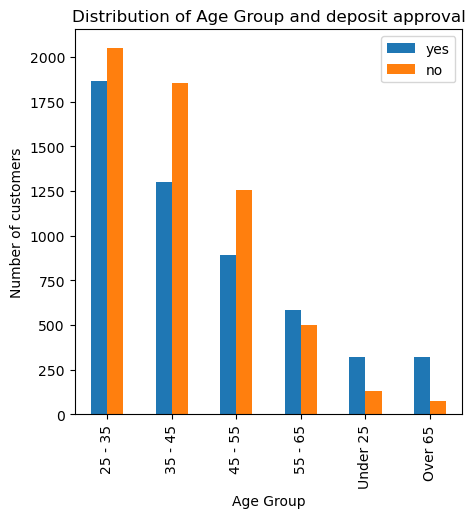

           yes_perc  no_perc
Age Group                   
25 - 35       47.67    52.33
35 - 45       41.20    58.80
45 - 55       41.55    58.45
55 - 65       53.96    46.04
Under 25      71.11    28.89
Over 65       80.40    19.60


In [480]:
for var in categorcal_vars:
    plot_bar(var)
    create_table(var)

### Analysis of several categorical variables reveals:

1. Customers in management profession have highest approval count and fairly high approval rate, followed by technicians and blue-collar workers. Noticeably, although students and retired people have lower approval counts, they have the 1st and 2nd highest approval rate.

2.  Although married people have high absolute approval counts (~2700 people), single people respond considerably better in relative terms.

3.  Secondary (high school level) and Tertiary customers (college level) often agree to deposit service, although the latter shows significantly better approval rate.

4.  People who do not own personal property/housing tend to agree more to deposit.

5.  People without loans tend to agree more to deposit.

6.  Best means of contact is via cellular phone.

7.  People who approved to previous campaign of the Bank also respond to the deposit service.

8. Customers with age of 25 - 55 have fairly high approval counts yet lower approval rate, while the opposite pattern is observed from people under 25 and over 55

## Numerical variables

In [483]:
df['map_deposit'] = df.deposit.map({'yes':1,'no':0})

In [484]:
numerical_vars =  ['balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'map_deposit']

# Create correlation matrix to assess possible numerical variables that may influence deposit decisions:
matrix = df[numerical_vars].corr()
matrix.style.background_gradient(cmap='PuBu')

,balance,day,duration,campaign,pdays,previous,map_deposit
balance,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805,0.081129
day,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981,-0.056326
duration,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716,0.451919
campaign,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699,-0.128081
pdays,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272,0.151593
previous,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000,0.139867
map_deposit,0.081129,-0.056326,0.451919,-0.128081,0.151593,0.139867,1.000000


Duration shows fairly strong correlation with deposit decision, followed by 'pdays', 'previous'.

We perform histogram analysis of these variables to have further assessment.

In [486]:
# Create function that plots pattern of yes/no decisions by a specific numerical dimension
def plot_hist(variable):
    for i in ['yes','no']:
        ax = df[(df.deposit==i)][variable].plot(kind='hist', alpha=0.5, legend=f'{i}', xlabel=f'{variable}', 
                                              title=f'{variable} vs. Deposit Decision')
    ax.legend(['yes','no'])
    plt.show()

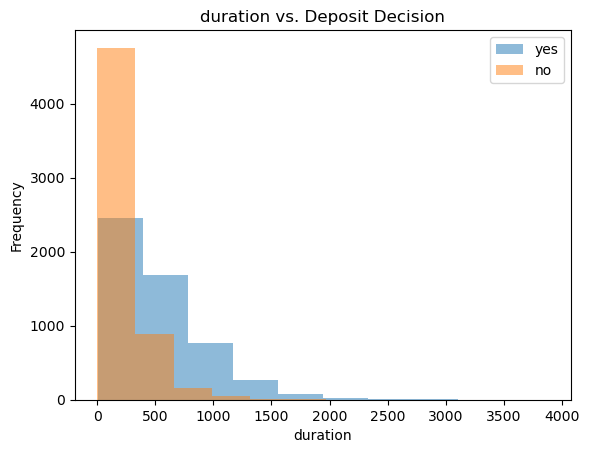

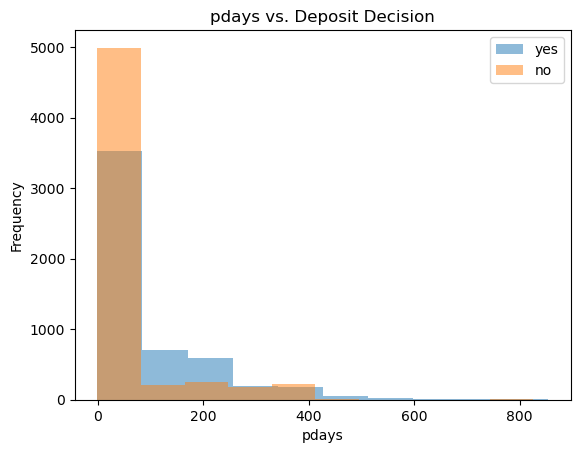

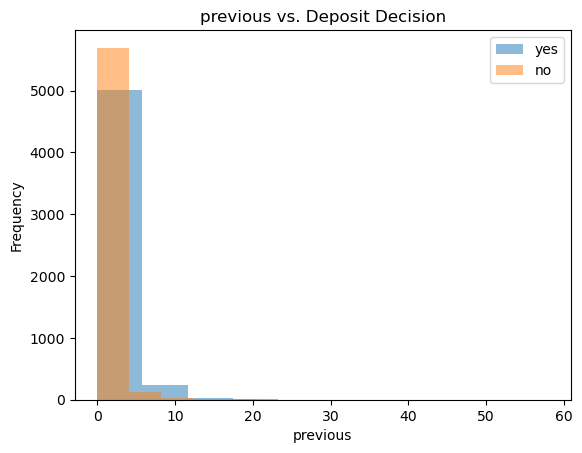

In [487]:
specific_numerical_vars =  ['duration', 'pdays', 'previous']
for var in specific_numerical_vars:
    plot_hist(var)

### Analysis of several numerical variables reveals:

1. Customers with calling duration of around 400 seconds (~7 minutes) upwards respond considerably better to the deposit service. This could mean that calls that lend more information of the service can be persuasive to customers.

2. Customers who have experienced previous campaigns respond to the deposit service better.

## Deposit Decisions over Time

In [490]:
month_deposit = pd.DataFrame()
month_deposit['yes'] = df[df.deposit == 'yes']['month'].value_counts()
month_deposit['no'] = df[df.deposit == 'no']['month'].value_counts()

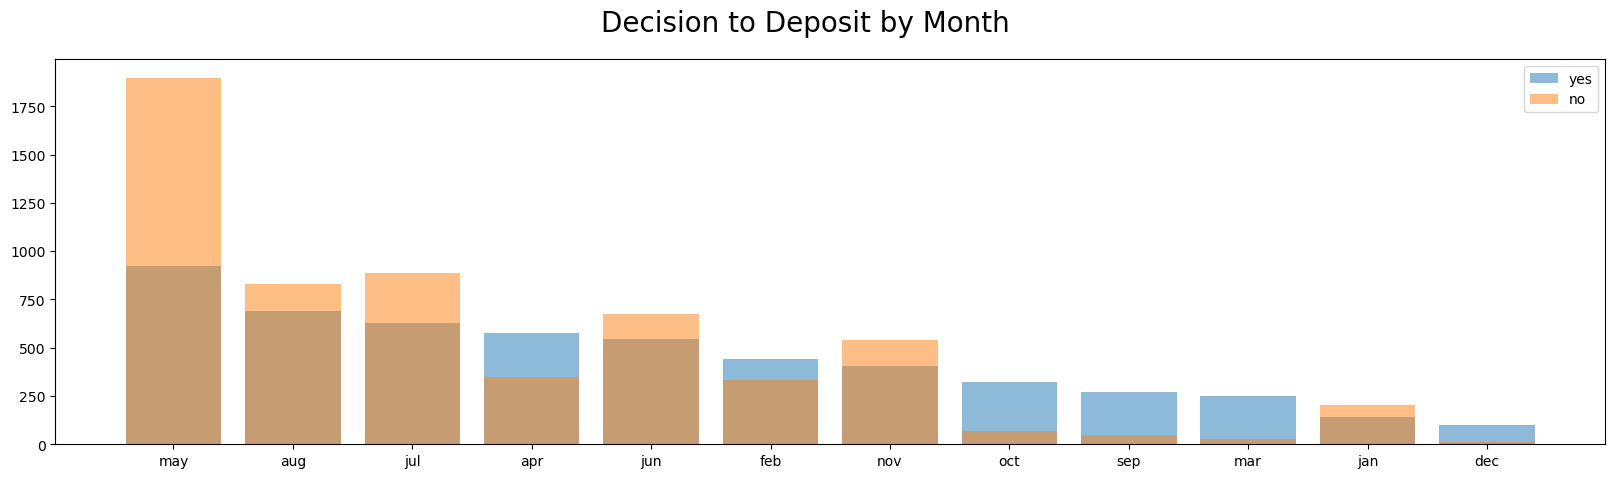

       yes_perc  no_perc
month                   
may       32.75    67.25
aug       45.29    54.71
jul       41.41    58.59
apr       62.51    37.49
jun       44.68    55.32
feb       56.83    43.17
nov       42.74    57.26
oct       82.40    17.60
sep       84.33    15.67
mar       89.86    10.14
jan       41.28    58.72
dec       90.91     9.09


In [491]:
fig = plt.figure(figsize = (20,5))
for column in month_deposit.columns:
    plt.bar(x = month_deposit.index, height = month_deposit[column], alpha = 0.5)
plt.legend(['yes','no'])
fig.suptitle('Decision to Deposit by Month', fontsize = 20)
plt.show()

create_table('month')

May is the month where approval counts is the highest due to high numbers of customers approached, yet have the lowest approval rate.

Consider identifying why there was an upsurge in disapprovals.

# Conclusions and recommendations

1. Increase the time of contact with customers as call duration strongly affect approval decisions . It is possible to consider using other communication channels that can effectively and concisely convey more information about the deposit service.

2. Take into account the timeline of the campaign. May seems to be the most effective in approaching customers, yet it is worth investigating why there was an increase in disapprovals.

3. Focus more on targeting customers of certain age groups. The model shows that young and senior citizens, or students and retired customers respond better to deposit proposal.

4. Consider reaching customers who already have successful past experience with the Bank's services. These customers tend to have good impression and trust built, which likely leads to approvals.

Given these reasoning and analysis, it is recommended to concentrate on those consumer groups that are potentially more promising to enhance approval counts as well as approval rates.
